Context
* The Convention on International Trade in Endangered Species of Wild Fauna and Flora, or CITES for short, is an international treaty organization tasked with monitoring, reporting, and providing recommendations on the international species trade. CITES is a division of the IUCN, which is one of the principal international organization focused on wildlife conversation at large. It is not a part of the UN (though its reports are read closely by the UN).

* CITES is one of the oldest conservation organizations in existence. Participation in CITES is voluntary, but almost every member nation in the UN (and, therefore, almost every country worldwide) participates. Countries participating in CITES are obligated to report on roughly 5000 animal species and 29000 plant species brought into or exported out of their countries, and to honor limitations placed on the international trade of these species.

* Protected species are organized into three appendixes.
* Appendix I species are those whose trade threatens them with extinction. Two particularly famous examples of Class I species are the black rhinoceros and the African elephant, whose extremely valuable tusks are an alluring target for poachers exporting ivory abroad. There are 1200 such species. 
* Appendix II species are those not threatened with extinction, but whose trade is nevertheless detrimental. Most species in cites, around 21000 of them, are in Appendix II. 
* Finally, Appendix III animals are those submitted to CITES by member states as a control mechanism. There are about 170 such species, and their export or import requires permits from the submitting member state(s).

* This dataset records all legal species imports and exports carried out in 2016 (and a few records from 2017) and reported to CITES. Species not on the CITES lists are not included; nor is the significant, and highly illegal, ongoing black market trading activity.

#### Content
* This dataset contains records on every international import or export conducted with species from the CITES lists in 2016. It contains columns identifying the species, the import and export countries, and the amount and characteristics of the goods being traded (which range from live animals to skins and cadavers).

* For further details on individual rows and columns refer to the metadata on the /data tab. A much more detailed description of each of the fields is available in the original CITES documentation.


* Year year in which trade occurred
* Appendix CITES Appendix of taxon concerned
* Taxon scientific name of animal or plant concerned
* Importer country of import (where exports are reported, this is the declared country of 
destination)
* Exporter country of export (where imports are reported, this is the declared country 
from which the specimens were consigned)
* Origin country of origin (this column is blank if the country of export is the country 
of origin, or if the country of origin is not reported)
* Imp Quantity quantity of specimens reported as imports by the importing country
* Imp Unit unit associated with the quantity reported by the importing country, e.g. 
'KIL' (kilograms). If no unit is shown, the figure represents the total number 
of specimens
* Imp Term description of specimens traded, as reported by the importing country
* Imp Purpose purpose of the transaction (see Annex 2), as reported by the importing 
country
* Imp Source source of the specimen (see Annex 2), as reported by the importing country
(*Re-)Exp Quantity quantity of specimens reported as (re-)exports by the (re-)exporting country
*(Re-)Exp Unit unit associated with the quantity reported by the (re-)exporting country, e.g. 
'KIL' (kilograms). If no unit is shown, the figure represents the total number 
of specimens
* (Re-Exp) Term description of specimens traded, as reported by the (re-)exporting country
* CITES Trade Database – User guide, version 8 7(Re-Exp) Purpose purpose of the transaction (see Annex 2), as reported by the (re-)exporting 
country
* (Re-Exp) Source source of the specimen (see Annex 2), as reported by the (re-)exporting 
country.
* A list of the term and unit codes used is provided in Annex 1

### Purposes
* The reported purpose of the transaction is shown as a one-letter code:
* B Breeding in captivity or artificial propagation
* E Educational
* G Botanical garden
* H Hunting trophy
* L Law enforcement / judicial / forensic
* M Medical (including biomedical research)
* N Reintroduction or introduction into the wild
* P Personal
* Q Circus or travelling exhibition
* S Scientific
* T Commercial
* Z Zoo

### Inspiration
* What is the geospatial distribution of the international plant/animal trade?
* How much export/import activity is there for well-known species, like rhinos, elephants, etcetera?
* What percent of the trade is live, as opposed to animal products (ivory, skins, cadavers, etcetera)?

## QUESTIONS 
* Analysis of each class and how they are being affected 
* Comparison of each class 
* A detailed analysis on various features

## Reading files 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
files = pd.read_csv('cites.csv')
files.head()
birds = files[files['Class'] == 'Aves']

## Cleaning

In [4]:
birds.isnull().sum()

Year                             0
App.                             0
Taxon                            0
Class                            0
Order                            0
Family                           9
Genus                           30
Importer                         8
Exporter                        11
Origin                        4244
Importer reported quantity    3924
Exporter reported quantity    1792
Term                             0
Unit                          6770
Purpose                         17
Source                          23
dtype: int64

In [99]:
birds.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6861 entries, 0 to 67157
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6861 non-null   int64  
 1   App.                        6861 non-null   object 
 2   Taxon                       6861 non-null   object 
 3   Class                       6861 non-null   object 
 4   Order                       6861 non-null   object 
 5   Family                      6852 non-null   object 
 6   Genus                       6831 non-null   object 
 7   Importer                    6853 non-null   object 
 8   Exporter                    6850 non-null   object 
 9   Exporter reported quantity  5069 non-null   float64
 10  Term                        6861 non-null   object 
 11  Purpose                     6844 non-null   object 
 12  Source                      6838 non-null   object 
dtypes: float64(1), int64(1), object(

In [6]:
birds.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Exporter reported quantity,Term,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,1.0,bodies,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,1.0,bodies,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,43.0,feathers,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,43.0,specimens,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,specimens,S,W


In [7]:
print('\n',birds['Order'].unique())
print('\n',birds['Importer'].unique())
print('\n',birds['Term'].unique())
print('\n',birds['Purpose'].unique())


 ['Falconiformes' 'Anseriformes' 'Coraciiformes' 'Psittaciformes'
 'Ciconiiformes' 'Columbiformes' 'Passeriformes' 'Gruiformes'
 'Galliformes' 'Charadriiformes' 'Sphenisciformes' 'Struthioniformes'
 'Apodiformes' 'Trogoniformes' 'Cuculiformes' 'Piciformes' 'Rheiformes'
 'Strigiformes']

 ['TR' 'XV' 'BE' 'DK' 'BR' 'CA' 'MC' 'GB' 'CN' 'SG' 'ZA' 'AT' 'KP' 'TW'
 'BH' 'OM' 'QA' 'TH' 'US' 'CH' 'DE' 'AE' 'BS' 'CR' 'JP' 'KG' 'KW' 'KZ'
 'NL' 'SR' 'KR' 'LT' 'NO' 'NZ' 'PA' 'XX' 'BG' 'CZ' 'FR' 'GR' 'IR' 'PH'
 'SA' 'MX' 'RU' 'ES' 'GE' 'GI' 'IQ' 'JO' 'MA' 'PK' 'RS' 'TN' 'UZ' 'AM'
 'IT' 'JE' 'SI' 'IE' 'SD' 'SK' 'UA' 'CD' 'BD' 'DZ' 'AR' 'NP' 'VN' 'ID'
 'MY' 'EG' 'CW' 'AO' 'HK' 'NI' 'PT' 'SE' 'BN' 'LV' 'DO' 'LK' 'MV' 'GH'
 'LB' 'PL' 'IN' 'MM' 'TT' 'BA' 'PE' 'CU' 'PY' 'IL' 'EC' 'GG' 'HU' 'CO'
 'EE' 'GT' 'MZ' 'SN' 'CL' 'ME' 'AW' 'AZ' 'LI' nan 'BZ' 'AU' 'BM' 'ZW' 'VE'
 'BB' 'CY' 'JM' 'LY' 'VG' 'UY' 'KE' 'MU' 'TZ' 'HN' 'TJ' 'AN' 'SY' 'CV'
 'AF' 'AL' 'FI' 'HT' 'MD' 'MG' 'ML' 'MW' 'NG' 'TM' 'RO' 'GL' 'KY' '

## Basic Analysis

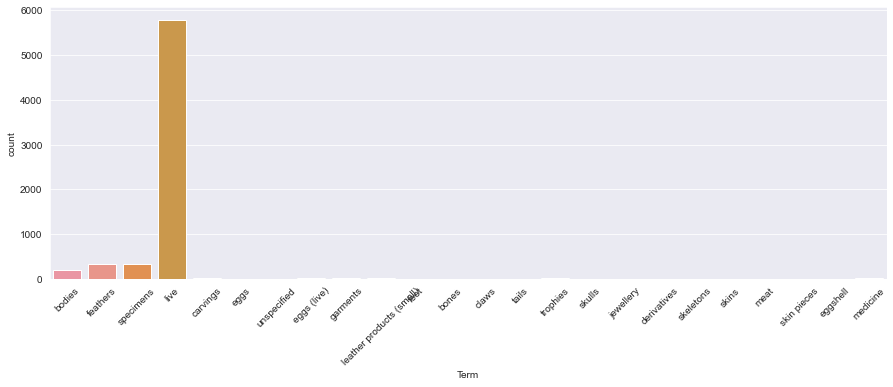

In [115]:
plt.figure(figsize = (15,5))
sns.countplot(x = birds['Term'])
plt.xticks(rotation = 45)
plt.show()

* From this we can interpret that the major reason behind the trade is live birds.


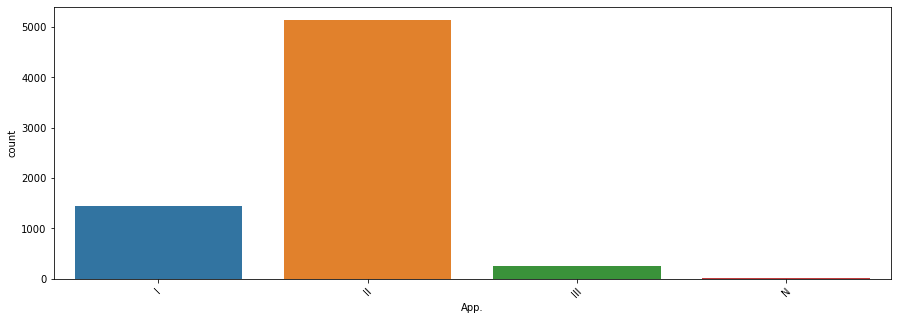

In [13]:
plt.figure(figsize = (15,5))
sns.countplot(x = birds['App.'])
plt.xticks(rotation = 45)
plt.show()

*  We can see that a majority of the trade is of Appendix 2 species,these species are not threatened by extinction but they are detrimental to nature.

## Most Common Order

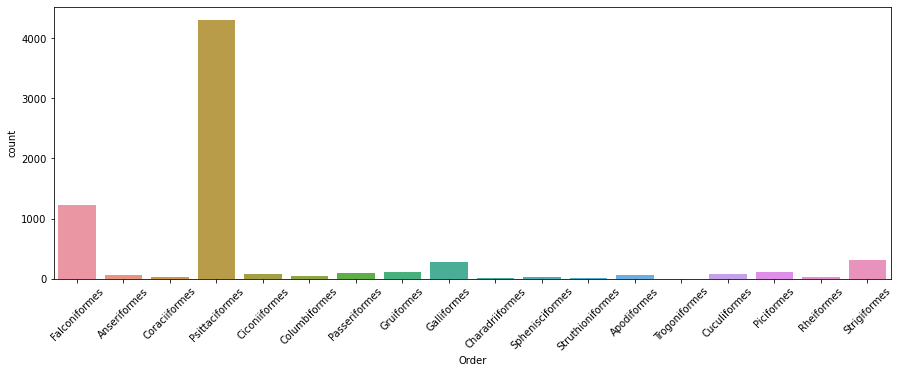

In [14]:
plt.figure(figsize = (15,5))
sns.countplot(x = birds['Order'])
plt.xticks(rotation = 45)
plt.show()

* Birds of the order 'Coraciiformes' are the most common in trade .
* Let's analyse the order more meticulously

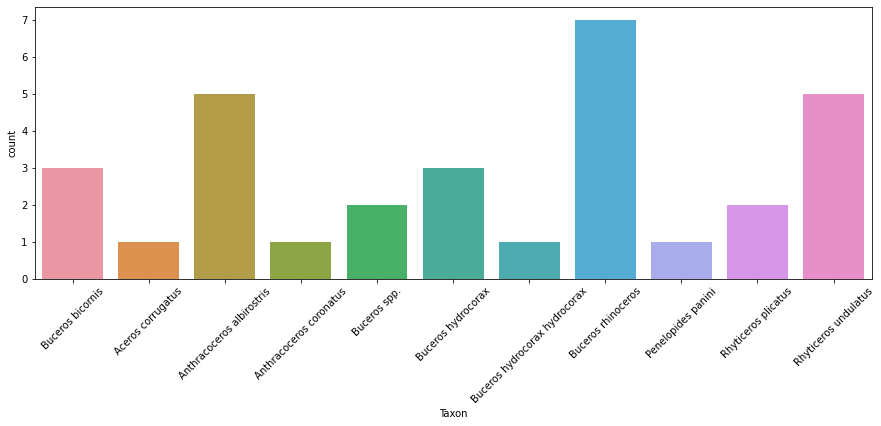

In [19]:
birds_common = birds[birds['Order'] == 'Coraciiformes']
plt.figure(figsize = (15,5))
sns.countplot(x = birds_common['Taxon'])
plt.xticks(rotation = 45)
plt.show()

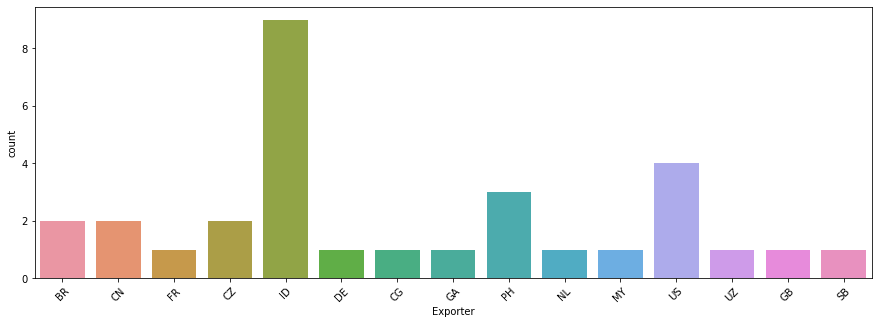

In [25]:
plt.figure(figsize = (15,5))
sns.countplot(x = birds_common['Exporter'])
plt.xticks(rotation = 45)
plt.show()

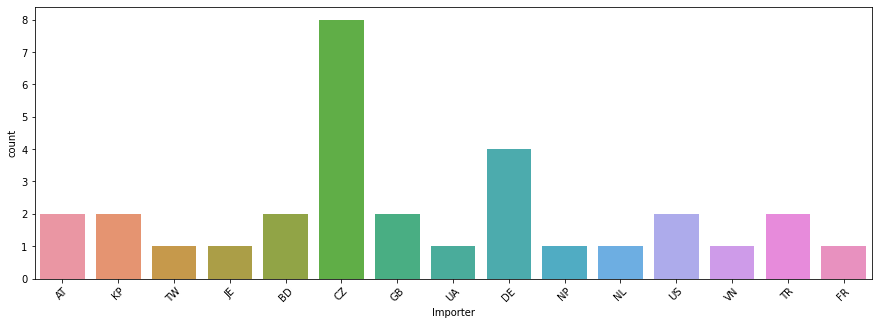

In [21]:
plt.figure(figsize = (15,5))
sns.countplot(x = birds_common['Importer'])
plt.xticks(rotation = 45)
plt.show()

* The leading exporter of this order is Indonesia
* The leading importer of this order is Czech Republic.

<AxesSubplot:xlabel='Genus', ylabel='Exporter reported quantity'>

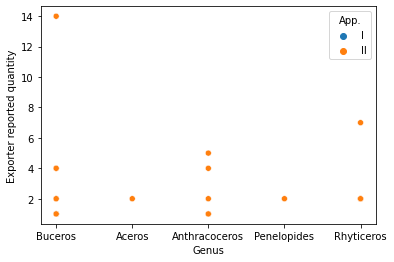

In [65]:
sns.scatterplot(x = birds_common['Genus'],y = birds_common['Exporter reported quantity'], hue = birds_common['App.'])

## Analysis Based On Appendix
### Appendix 1 Category
* We will do a detailed analysis on Appendix 1 category
#### Task 1 : 
* We need to know the distribution based on Year
* We need to get the purpose of the trade.
* We need to get the source of the birds involved in the trade.
* We need to know the most traded genus and the exporter and quantity


In [93]:
birds_1 = birds[birds['App.'] == 'I']
birds_1.info()
birds_1['Family'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 67012
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1450 non-null   int64  
 1   App.                        1450 non-null   object 
 2   Taxon                       1450 non-null   object 
 3   Class                       1450 non-null   object 
 4   Order                       1450 non-null   object 
 5   Family                      1448 non-null   object 
 6   Genus                       1447 non-null   object 
 7   Importer                    1450 non-null   object 
 8   Exporter                    1448 non-null   object 
 9   Exporter reported quantity  1107 non-null   float64
 10  Term                        1450 non-null   object 
 11  Purpose                     1449 non-null   object 
 12  Source                      1449 non-null   object 
dtypes: float64(1), int64(1), object(

array(['Accipitridae', 'Anatidae', 'Bucerotidae', 'Cacatuidae',
       'Cathartidae', 'Ciconiidae', 'Columbidae', 'Falconidae',
       'Fringillidae', 'Gruidae', 'Muscicapidae', 'Otididae',
       'Phasianidae', 'Psittacidae', 'Scolopacidae', 'Spheniscidae',
       'Struthionidae', 'Sturnidae', 'Threskiornithidae', 'Trochilidae',
       'Trogonidae', nan], dtype=object)

2016    1447
2017       3
Name: Year, dtype: int64

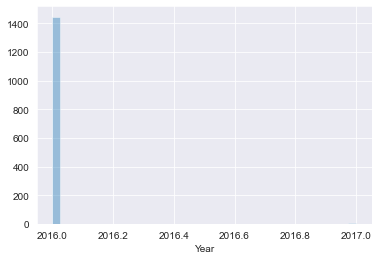

In [108]:
sns.distplot(a = birds_1['Year'],kde = False)
birds_1['Year'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


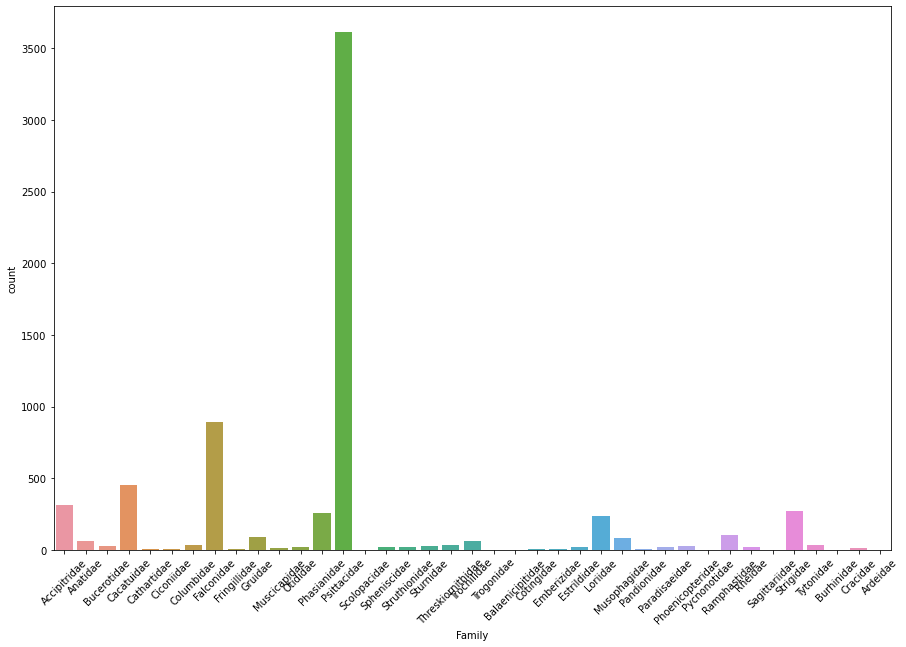

In [63]:
plt.figure(figsize = (15,10))
sns.countplot(birds['Family'])
plt.xticks(rotation = 45)
plt.show()

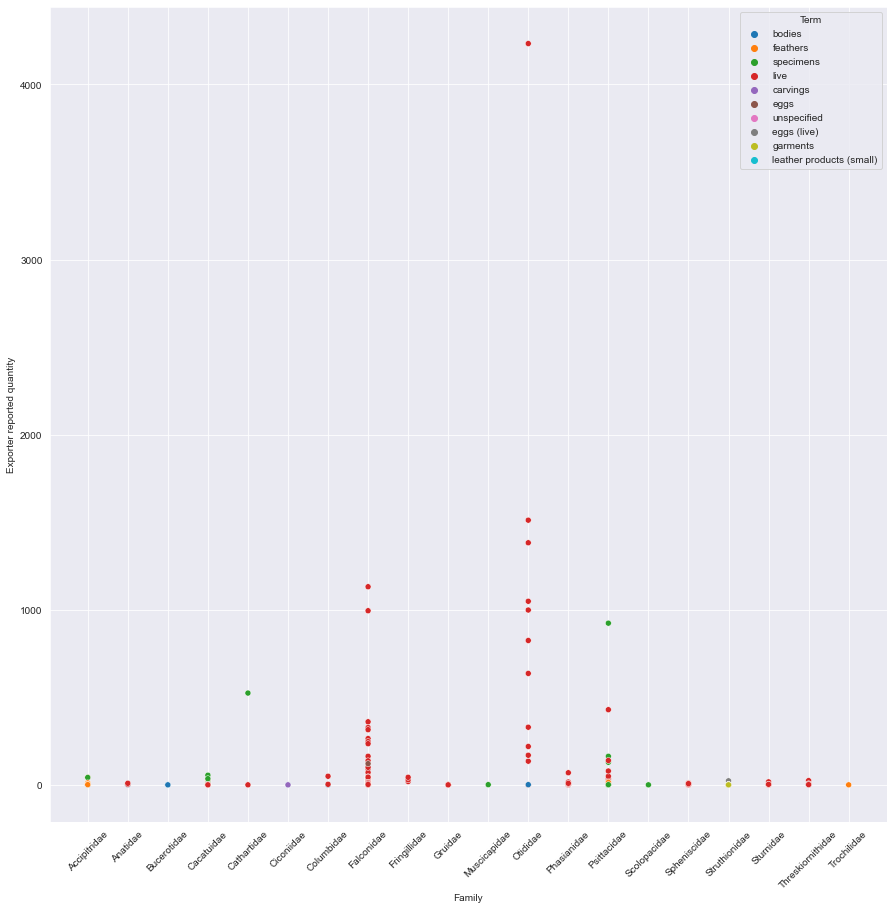

In [113]:
plt.figure(figsize = (15,15))

sns.set_style('darkgrid')
sns.scatterplot(x = birds_1['Family'],y = birds_1['Exporter reported quantity'],hue = birds_1['Term'])
plt.xticks(rotation = 45)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxon', ylabel='count'>

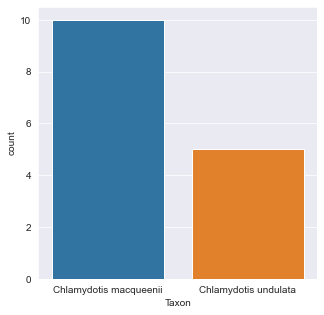

In [118]:
birds_most = birds_1[birds_1['Family'] =='Otididae']
plt.figure(figsize = (5,5))
sns.countplot(birds_most['Taxon'])

<AxesSubplot:xlabel='Exporter', ylabel='Exporter reported quantity'>

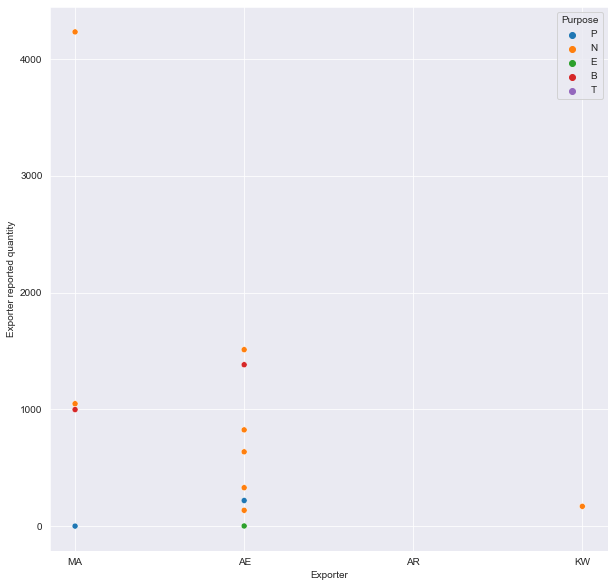

In [110]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Exporter',y = 'Exporter reported quantity',hue = 'Purpose',data = birds_most)

<AxesSubplot:xlabel='Exporter', ylabel='Exporter reported quantity'>

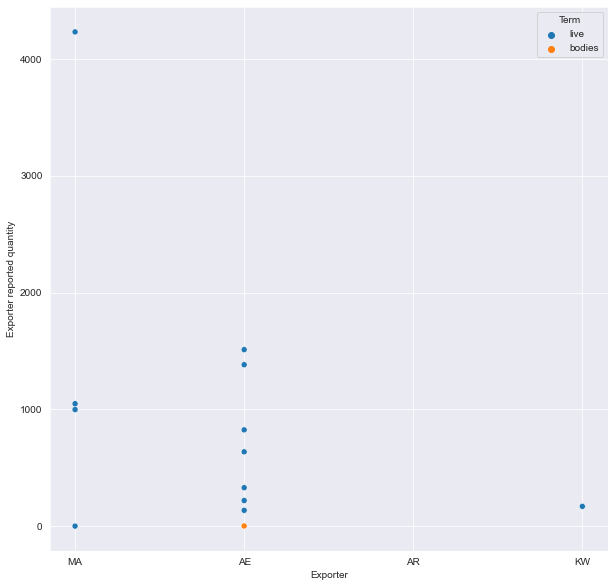

In [117]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Exporter',y = 'Exporter reported quantity',hue = 'Term',data = birds_most)

* Most of the trade occured during the year 2016
* The most common bird in the appendix is 'Phasianidae'.
* The most exported order of bird is 'Otididae'.
* The major exporter of order ''Otididae' is UNITED ARAB EMIRATES with range upto 1500 of the species 'Macqueeeni'.
* The purpose behind the trade of the species is 